In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mpl.rc('figure', figsize = (12,6))
mpl.rc('font', size = 14)

In [3]:
file = 'A:\\Data Analysis Jupyter\\Indian Movies\\hindi_movies.csv'
data = pd.read_csv(file)
data.head()


,Rating,Votes,Description,Title,Gross,Director,Release,Stars,Genre,Gross (India)
0,8.7,"59,702","Biopic of Mahavir Singh Phogat, who taught wre...",Dangal,"11,151,900",Nitesh Tiwari,21-Dec-16,"Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh","Action,Biography,Drama,Sport",387.39
1,8.2,"106,800",P. K. is a comedy of ideas about a stranger in...,PK,"10,572,800",Rajkumar Hirani,19-Dec-14,"Aamir Khan,Anushka Sharma,Sanjay Dutt","Comedy,Drama,Fantasy,Romance,Sci-Fi",339.50
2,8.1,"51,638",A little mute girl from a Pakistan village get...,Bajrangi Bhaijaan,"7,655,452",Kabir Khan,17-Jul-15,"Salman Khan,Kareena Kapoor Khan,Nawazuddin Sid...","Action,Adventure,Comedy,Drama",320.34
3,7.2,"27,251",Sultan is a story of Sultan Ali Khan - a local...,Sultan,"6,173",Ali Abbas Zafar,6-Jul-16,"Salman Khan,Anushka Sharma,Marko Zaror","Action,Drama,Family,Romance,Sport",300.45
4,5.4,"36,496",The favourite Indian action franchise is back....,Dhoom 3,"8,031,955",Vijay Krishna Acharya,20-Dec-13,"Aamir Khan,Katrina Kaif,Abhishek Bachchan","Action,Crime,Drama,Thriller",280.25


In [4]:
# Data type of each column
data.iloc[0].apply(type)

Rating           <class 'numpy.float64'>
Votes                      <class 'str'>
Description                <class 'str'>
Title                      <class 'str'>
Gross                      <class 'str'>
Director                   <class 'str'>
Release                    <class 'str'>
Stars                      <class 'str'>
Genre                      <class 'str'>
Gross (India)    <class 'numpy.float64'>
Name: 0, dtype: object

## Cleaning
*Votes* and *Gross* is of type `string`, should be converted to `integer`.
But `pd.to_numeric()` wont work as strings contain commas and commas are to be removed first. 

In [5]:
# Replace every comma with empty string in column votes
data['Votes'] = data['Votes'].str.replace(',', '')
# convert values under votes column from String to Integer
data['Votes'] = pd.to_numeric(data['Votes'])

In [6]:
data['Gross'] = data['Gross'].str.replace(',', '')
data['Gross'] = pd.to_numeric(data['Gross'])

## Exploring the dataset

In [7]:
data.shape

(5607, 10)

In [8]:
data.duplicated().sum()

0

## Analysing the Rating

In [9]:
# create a df of movies for which a RATING is present
movies_with_rating = data[data['Rating'].isnull() ==  False]
# summary stats
movies_with_rating[['Rating', 'Votes']].describe()

,Rating,Votes
count,4798.000000,4798.000000
mean,5.948458,1597.706753
std,1.364512,6843.694953
min,1.100000,5.000000
25%,5.000000,21.000000
50%,6.100000,70.000000
75%,7.000000,512.000000
max,9.000000,244050.000000


The _Rating_ is calculated as the mean of all the ratings a particular movie has recieved. 
_number of ratings_ recieved is *Votes*. Minimum no. of Votes a movie has received is 5. It is too low, and might create biased Rating.
Therefore, remove such bias and consider Rating as valid for which at least 100 votes have been made. Votes > 100.

In [10]:
# chunk up only Votes >= 100
movies_with_rating = movies_with_rating[movies_with_rating['Votes'] >= 100]
movies_with_rating[['Rating','Votes']].describe()

,Rating,Votes
count,2141.000000,2141.000000
mean,5.930453,3542.204577
std,1.459720,9907.354596
min,1.700000,100.000000
25%,4.900000,248.000000
50%,6.100000,667.000000
75%,7.100000,2504.000000
max,8.900000,244050.000000


In [11]:
plt.style.use('fivethirtyeight')

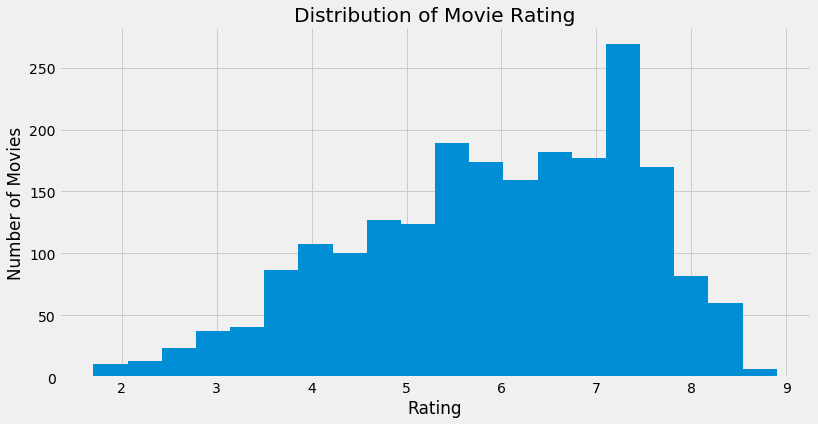

In [12]:
# plot Histogram
plt.hist(movies_with_rating['Rating'].sort_values(), bins = 20 )
plt.title("Distribution of Movie Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.show()

Distribution of ratings is **negatively skewed**. The negative slope indicated that few movies _drag down_ **mean** *Rating* of the dataset. Thus, **median** is to be used as it gives a better avg when distrubutions are skewed.

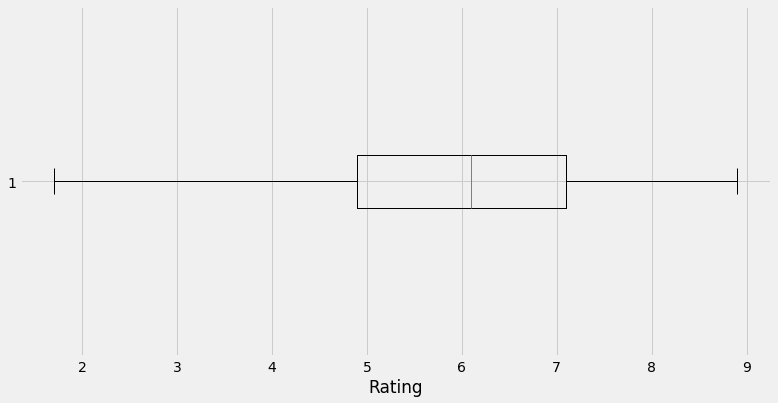

In [13]:
# Boxplot to show rante of ratings
plt.boxplot(movies_with_rating['Rating'], vert = False)
plt.xlabel('Rating')
plt.show()

In [14]:
print("Median")
movies_with_rating['Rating'].median()

Median


6.1

The orange line in boxplot shows the median which is **6.1** and there are no outliers.

## Analysing 'Gross'
There are 2 Gross columns, Gross column represents US box earnings and Gross(India) column represents box office collection in India

### Box office Gross (USA)

In [15]:
# Create a df of movies where Gross USA figure is present
movies_with_gross = data[data['Gross'].isnull() == False]
#display number of movies having Gross count
movies_with_gross['Gross'].count() 

304

In [16]:
movies_with_gross['Gross'].describe()

count    3.040000e+02
mean     1.039095e+06
std      1.617755e+06
min      1.954000e+03
25%      2.205232e+05
50%      5.409520e+05
75%      1.159148e+06
max      1.387697e+07
Name: Gross, dtype: float64

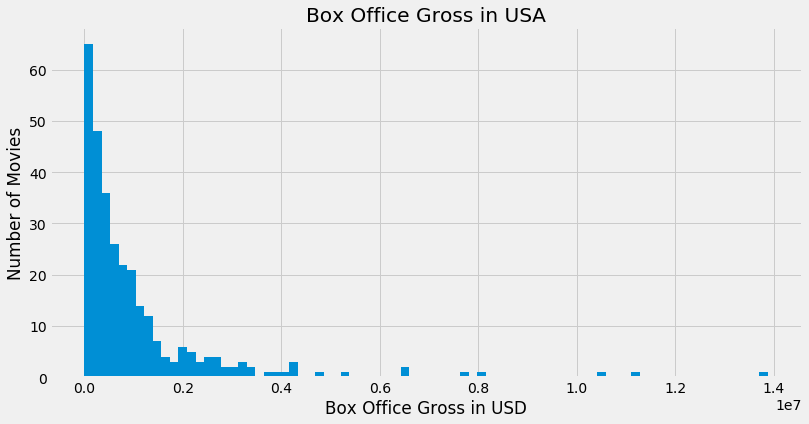

In [17]:
#plot histogram of US gross
plt.hist(movies_with_gross['Gross'].sort_values(), bins = 80)
plt.title("Box Office Gross in USA")
plt.xlabel("Box Office Gross in USD")
plt.ylabel('Number of Movies')
plt.show()

Distrubution is skewed heavily towards right as very few movies have grossed beyond 0.4 millions. Most of them gross in the range of 0.0 to 0.4 .

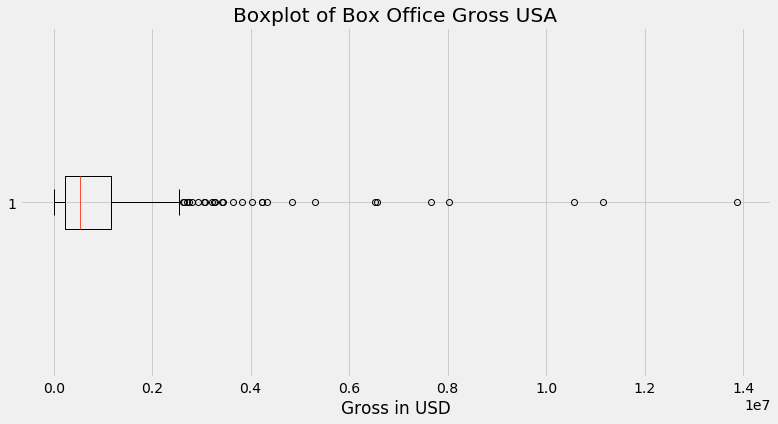

In [18]:
plt.boxplot(movies_with_gross['Gross'], vert = False)
plt.title("Boxplot of Box Office Gross USA")
plt.xlabel('Gross in USD')
plt.show()

It can be seen, median is quite low. And handful of movies make good money than the average, this is shown by the outliers on the boxplot.

In [19]:
# finding the outliers in the dataset
q1 = movies_with_gross['Gross'].quantile(0.25)
q3 = movies_with_gross['Gross'].quantile(0.75)
q1, q3

# 25th percentile of the data 2,20,523.25, 75th percentile data 11,59,148.25

(220523.25, 1159148.25)

In [20]:
iqr = q3 - q1 
iqr
# 9,38,625

938625.0

Quantiles are lines that divide group into equal groups.
Percentiles divide lines into 100 equally sized groups.


In [21]:
1159148.25- 220523.25


938625.0

#### IQR - Intquartile Range.
measure of variability, based on dividing a data set into quartiles.

The interquartile range iqr is the range of the middle 50% of the values in a data set, which is calculated as the difference between the 75th [upper quartile Q3] and 25th percentile [lower quartile Q1] values.

Mild outliers are those lower than the 25th quartile [Q1] minus 1.5 x IQR or greater than the 75th quartile [Q3] plus 1.5 x IQR.

Reference - https://www.back2code.me/2017/08/outliers/

In [22]:
print(movies_with_gross > (q3 + 1.5 * iqr))

# False indicates valid points, true = presence of outliers

      Rating  Votes  Description  Title  Gross  Director  Release  Stars  \
0      False  False         True   True   True      True     True   True   
1      False  False         True   True   True      True     True   True   
2      False  False         True   True   True      True     True   True   
3      False  False         True   True  False      True     True   True   
4      False  False         True   True   True      True     True   True   
5      False  False         True   True  False      True     True   True   
6      False  False         True   True  False      True     True   True   
7      False  False         True   True   True      True     True   True   
8      False  False         True   True   True      True     True   True   
10     False  False         True   True  False      True     True   True   
11     False  False         True   True   True      True     True   True   
12     False  False         True   True   True      True     True   True   
13     False

In [23]:
outliers = movies_with_gross.query('Gross > (@q3 + 1.5*@iqr)')
outliers.describe()

,Rating,Votes,Gross,Gross (India)
count,28.000000,28.000000,2.800000e+01,16.000000
mean,7.025000,42729.142857,4.929001e+06,183.310625
std,1.083761,45283.741383,2.897258e+06,103.728969
min,4.700000,1558.000000,2.633885e+06,22.210000
25%,6.325000,20244.500000,3.069054e+06,109.375000
50%,7.150000,31601.500000,3.739582e+06,161.500000
75%,7.925000,46213.750000,5.610831e+06,240.087500
max,8.700000,244050.000000,1.387697e+07,387.390000


**28** out of 304 movies can be considered as outliers.

In [24]:
# Display the median value for US Gross (Outliers)
print("Median gross of all movies = {}".format(movies_with_gross['Gross'].median()))
print("Median gross of Outliers = {}".format(outliers['Gross'].median()))
print("Ratio of mean gross = {}".format(outliers['Gross'].mean()/movies_with_gross['Gross'].mean()))
print("Ratio of median gross = {}".format(outliers['Gross'].median()/movies_with_gross['Gross'].median()))
print("Percentage of outliers = {}".format(outliers['Title'].count()/movies_with_gross['Title'].count() * 100))

Median gross of all movies = 540952.0
Median gross of Outliers = 3739582.5
Ratio of mean gross = 4.743551207424231
Ratio of median gross = 6.912965475679912
Percentage of outliers = 9.210526315789473


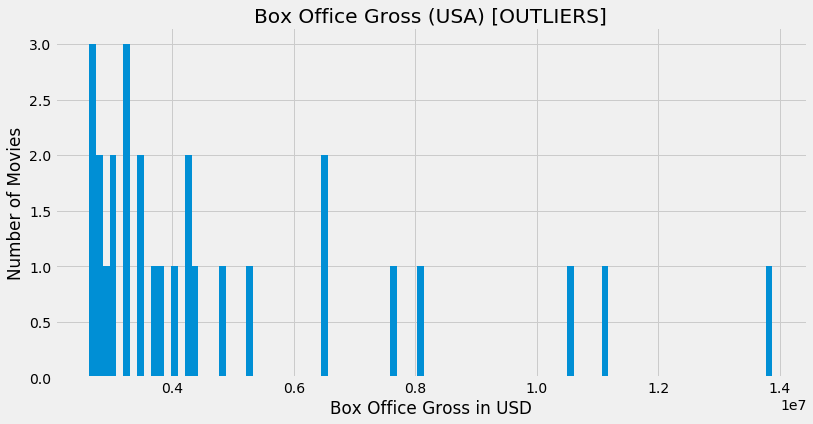

In [25]:
# Plot a histogram of US gross (Outliers)
plt.hist(outliers['Gross'].sort_values(), bins=100)
plt.title("Box Office Gross (USA) [OUTLIERS]")
plt.xlabel("Box Office Gross in USD")
plt.ylabel("Number of Movies")
plt.show()

Histogram depicts a positive skewness. Therefore, there exists **outliers within** `outliers`.

In [26]:
# Outliers within the outliers. 
print("Movies which have a US box office gross above $5 million:")
high_gross_in_us = movies_with_gross[movies_with_gross['Gross'] > 5.0e+6].sort_values('Gross', ascending=False)
high_gross_in_us.reset_index(inplace=True)
high_gross_in_us[['Title', 'Director', 'Stars', 'Rating', 'Gross', 'Gross (India)', 'Release']]

Movies which have a US box office gross above $5 million:


,Title,Director,Stars,Rating,Gross,Gross (India),Release
0,Monsoon Wedding,Mira Nair,"Naseeruddin Shah,Lillete Dubey,Shefali Shetty",7.4,13876974.0,NaN,26 April 2002
1,Dangal,Nitesh Tiwari,"Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh",8.7,11151900.0,387.39,21-Dec-16
2,PK,Rajkumar Hirani,"Aamir Khan,Anushka Sharma,Sanjay Dutt",8.2,10572800.0,339.50,19-Dec-14
3,Dhoom 3,Vijay Krishna Acharya,"Aamir Khan,Katrina Kaif,Abhishek Bachchan",5.4,8031955.0,280.25,20-Dec-13
4,Bajrangi Bhaijaan,Kabir Khan,"Salman Khan,Kareena Kapoor Khan,Nawazuddin Sid...",8.1,7655452.0,320.34,17-Jul-15
5,Bajirao Mastani,Sanjay Leela Bhansali,"Ranveer Singh,Priyanka Chopra,Deepika Padukone",7.2,6557047.0,184.00,18-Dec-15
6,3 Idiots,Rajkumar Hirani,"Aamir Khan,Madhavan,Mona Singh",8.4,6523137.0,NaN,25-Dec-09
7,Chennai Express,Rohit Shetty,"Deepika Padukone,Shah Rukh Khan,Sathyaraj",6.0,5306729.0,226.70,8-Aug-13


**Monsoon Wedding** is the highest gross Indian movie in USA following Dangal and PK.

# BOX OFFICE GROSS(INDIA)


In [27]:
# Create a df of movies for which Indian Gross Fig is present
movies_with_gross_india = data[data['Gross (India)'].isnull() == False ]
movies_with_gross_india['Gross (India)'].describe()

count    380.000000
mean      43.651579
std       55.031905
min        0.400000
25%        7.500000
50%       26.535000
75%       58.540000
max      387.390000
Name: Gross (India), dtype: float64

380 Movies are present for which Gross Figs in India are given.


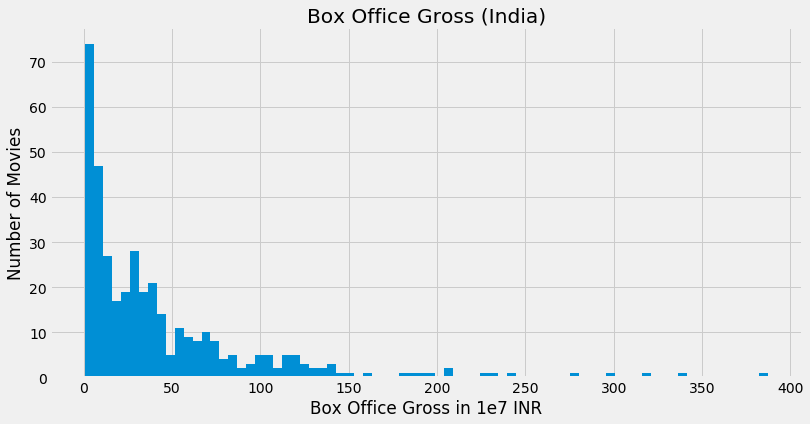

In [28]:
# Plot a histogram of Indian gross
plt.hist(movies_with_gross_india['Gross (India)'].sort_values(), bins=76)
plt.title("Box Office Gross (India)")
plt.xlabel("Box Office Gross in 1e7 INR")
plt.ylabel("Number of Movies")
plt.show()

**Positively Skewed**. Consider median rather than mean as few outliers increase the avg significantly.

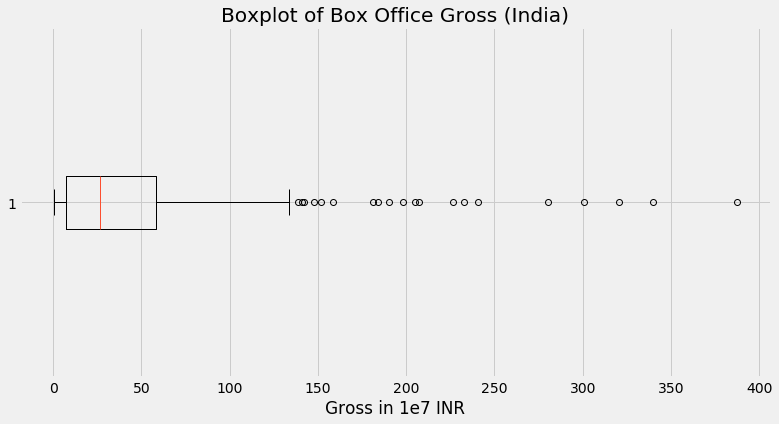

In [29]:
# Create a boxplot to show the range of Indian Gross
plt.boxplot(movies_with_gross_india['Gross (India)'], vert = False)
plt.title('Boxplot of Box Office Gross (India)')
plt.xlabel('Gross in 1e7 INR')
plt.show()

Median is quite **low**.

In [30]:
movies_with_gross_india.head()

,Rating,Votes,Description,Title,Gross,Director,Release,Stars,Genre,Gross (India)
0,8.7,59702.0,"Biopic of Mahavir Singh Phogat, who taught wre...",Dangal,11151900.0,Nitesh Tiwari,21-Dec-16,"Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh","Action,Biography,Drama,Sport",387.39
1,8.2,106800.0,P. K. is a comedy of ideas about a stranger in...,PK,10572800.0,Rajkumar Hirani,19-Dec-14,"Aamir Khan,Anushka Sharma,Sanjay Dutt","Comedy,Drama,Fantasy,Romance,Sci-Fi",339.50
2,8.1,51638.0,A little mute girl from a Pakistan village get...,Bajrangi Bhaijaan,7655452.0,Kabir Khan,17-Jul-15,"Salman Khan,Kareena Kapoor Khan,Nawazuddin Sid...","Action,Adventure,Comedy,Drama",320.34
3,7.2,27251.0,Sultan is a story of Sultan Ali Khan - a local...,Sultan,6173.0,Ali Abbas Zafar,6-Jul-16,"Salman Khan,Anushka Sharma,Marko Zaror","Action,Drama,Family,Romance,Sport",300.45
4,5.4,36496.0,The favourite Indian action franchise is back....,Dhoom 3,8031955.0,Vijay Krishna Acharya,20-Dec-13,"Aamir Khan,Katrina Kaif,Abhishek Bachchan","Action,Crime,Drama,Thriller",280.25


In [31]:
# Finding the outliers in the dataset
q1 = movies_with_gross_india['Gross (India)'].quantile(0.25)
q3 = movies_with_gross_india['Gross (India)'].quantile(0.75)
print(q1,q3)
print(q3 -q1)

7.5 58.53999999999999
51.03999999999999


In [32]:
iqr = q3 - q1
outliers = movies_with_gross_india.query('Gross > (@q3 + 1.5 * @iqr)')
outliers.describe()

,Rating,Votes,Gross,Gross (India)
count,117.000000,117.000000,1.170000e+02,117.000000
mean,6.180342,14739.068376,1.360197e+06,81.615983
std,1.318649,15969.287969,1.945435e+06,73.466779
min,2.300000,324.000000,6.108000e+03,6.000000
25%,5.400000,4179.000000,3.369850e+05,30.900000
50%,6.100000,8526.000000,5.860280e+05,58.000000
75%,7.200000,19699.000000,1.535234e+06,105.500000
max,8.700000,106800.000000,1.115190e+07,387.390000


In [33]:
# Comparison of all movies versus outliers
print("Median gross of all movies = {}".format(movies_with_gross_india['Gross (India)'].median()))
print("Median gross of outliers = {}".format(outliers['Gross (India)'].median()))
print("Ratio of mean gross = {}".format(outliers['Gross (India)'].mean()/movies_with_gross_india['Gross (India)'].mean()))
print("Ratio of median gross = {}".format(outliers['Gross (India)'].median()/movies_with_gross_india['Gross (India)'].median()))
print("Percentage of outliers = {}".format(outliers['Title'].count()/movies_with_gross_india['Title'].count() * 100))

Median gross of all movies = 26.535
Median gross of outliers = 58.0
Ratio of mean gross = 1.8697143350619452
Ratio of median gross = 2.185792349726776
Percentage of outliers = 30.789473684210527


**30.8%** are considered as outliers. These movies have a mean that is **1.8** times higher where median is **2.2** times higher.


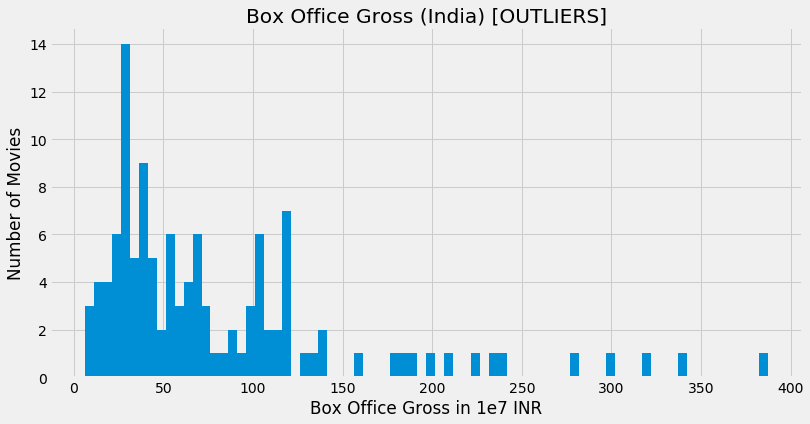

In [34]:
# Plot a histogram of Indian gross (Outliers)
plt.hist(outliers['Gross (India)'].sort_values(), bins=76)
plt.title("Box Office Gross (India) [OUTLIERS]")
plt.xlabel("Box Office Gross in 1e7 INR")
plt.ylabel("Number of Movies")
plt.show()

The ditribution is skewed to the the right and this shows that there exists outliers even within the outliers.

In [35]:
# Outliers amongst the outliers
print("Movies which have an Indian box office gross above INR 100cr:")
high_gross_in_india = movies_with_gross_india[movies_with_gross_india['Gross (India)'] > 100]
high_gross_in_india.sort_values('Gross (India)', ascending=False).reset_index(inplace=True)
high_gross_in_india[['Title', 'Director', 'Stars', 'Rating', 'Gross', 'Gross (India)', 'Release']] [:10]

Movies which have an Indian box office gross above INR 100cr:


,Title,Director,Stars,Rating,Gross,Gross (India),Release
0,Dangal,Nitesh Tiwari,"Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh",8.7,11151900.0,387.39,21-Dec-16
1,PK,Rajkumar Hirani,"Aamir Khan,Anushka Sharma,Sanjay Dutt",8.2,10572800.0,339.50,19-Dec-14
2,Bajrangi Bhaijaan,Kabir Khan,"Salman Khan,Kareena Kapoor Khan,Nawazuddin Sid...",8.1,7655452.0,320.34,17-Jul-15
3,Sultan,Ali Abbas Zafar,"Salman Khan,Anushka Sharma,Marko Zaror",7.2,6173.0,300.45,6-Jul-16
4,Dhoom 3,Vijay Krishna Acharya,"Aamir Khan,Katrina Kaif,Abhishek Bachchan",5.4,8031955.0,280.25,20-Dec-13
5,Krrish 3,Rakesh Roshan,"Priyanka Chopra,Hrithik Roshan,Amitabh Bachchan",5.3,2191343.0,240.50,1-Nov-13
6,Kick,Sajid Nadiadwala,"Salman Khan,Jacqueline Fernandez,Nawazuddin Si...",5.5,2461031.0,233.00,25-Jul-14
7,Chennai Express,Rohit Shetty,"Deepika Padukone,Shah Rukh Khan,Sathyaraj",6.0,5306729.0,226.70,8-Aug-13
8,Prem Ratan Dhan Payo,Sooraj R. Barjatya,"Salman Khan,Sonam Kapoor,Neil Nitin Mukesh",4.7,4328805.0,207.40,12-Nov-15
9,Happy New Year,Farah Khan,"Shah Rukh Khan,Deepika Padukone,Abhishek Bachchan",5.2,NaN,205.00,24-Oct-14


**Dangal** and **PK** are the highest grossers over **100 Crore INR** in India. Both Aamir Khan starrers.

### Most Popular Genre



In [36]:
# DF of movies for which genre is present
movies_with_genre = data[data['Genre'].isnull() == False]
data['Genre'].head()

0           Action,Biography,Drama,Sport
1    Comedy,Drama,Fantasy,Romance,Sci-Fi
2          Action,Adventure,Comedy,Drama
3      Action,Drama,Family,Romance,Sport
4            Action,Crime,Drama,Thriller
Name: Genre, dtype: object

In [37]:
# collecting the unique genres into a set
unique_genres = set()
for genre in movies_with_genre['Genre'].str.split(","):
    for g in genre:
        unique_genres.add(g)
        
    
print("Number of unique genres: {}".format(len(unique_genres)))

Number of unique genres: 21


There are **21** unique genres.

In [38]:
#Grouping by genres
movies_by_genre = dict()
genre_masks = dict()

# Dictionary of masks
for genre in unique_genres:
    genre_masks[genre] = movies_with_genre['Genre'].apply(lambda x: genre in x)


# create dic of movies witg particular genre
for genre in unique_genres:
    movies_by_genre[genre] = movies_with_genre[genre_masks[genre]]
    


In [39]:
# create a dic mapping of genre and number of movies belong to that genre
count_of_movies_by_genre = dict()

for genre in unique_genres:
    count_of_movies_by_genre[genre] = movies_by_genre[genre]['Title'].count()
    
count_of_movies_by_genre = pd.Series(count_of_movies_by_genre).sort_values(ascending = False)
print("Number of movies in each genre")
print(count_of_movies_by_genre)

Number of movies in each genre
Drama        3400
Romance      1658
Action       1538
Comedy       1170
Thriller     1001
Crime         873
Family        624
Music         563
Musical       538
Adventure     286
Mystery       279
Fantasy       167
Horror        157
History       102
Biography      60
War            48
Sport          44
Animation      43
Sci-Fi         41
Western         6
News            2
dtype: int64


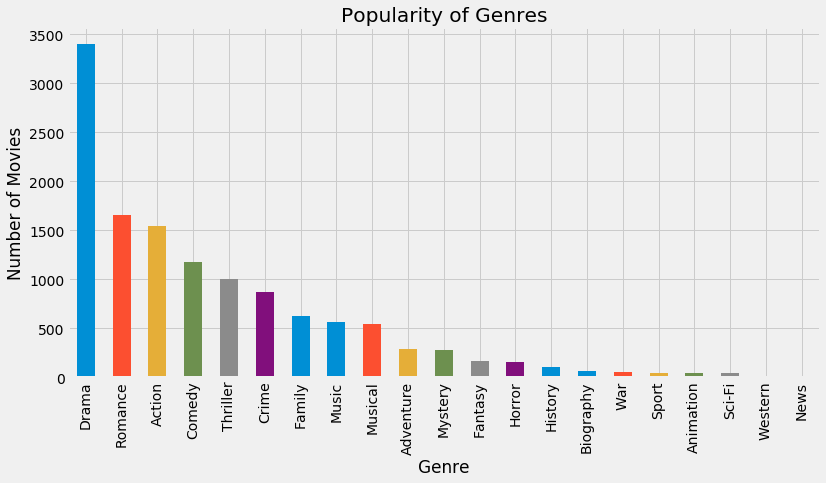

In [40]:
count_of_movies_by_genre.plot.bar()
plt.title('Popularity of Genres')
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.show()

**Drama** is the most popular genre. **News, Western and Sci-Fi** are the least popular genres in India.

In [41]:
# Create df which contains grouping of genres and the movies associated with
# the grouped genres
movies_with_grouped_genres = movies_with_genre.groupby('Genre')
print("Number of movies with particular group of genres :\n")
print(movies_with_grouped_genres.size()[:10]) 

Number of movies with particular group of genres :

Genre
Action                                                      237
Action,Adventure                                             12
Action,Adventure,Biography,Drama,History,Musical,Romance      1
Action,Adventure,Comedy                                       1
Action,Adventure,Comedy,Crime                                 1
Action,Adventure,Comedy,Crime,Drama,Thriller                  1
Action,Adventure,Comedy,Crime,Musical                         2
Action,Adventure,Comedy,Crime,Sport                           1
Action,Adventure,Comedy,Drama                                 6
Action,Adventure,Comedy,Drama,Fantasy                         1
dtype: int64


In [42]:
print("Most Popular Grouped Genres: \n")
print(movies_with_grouped_genres.size().sort_values(ascending = False)[:10])

Most Popular Grouped Genres: 

Genre
Drama                   600
Action                  237
Drama,Romance           229
Drama,Family            203
Romance                 180
Comedy                  177
Comedy,Drama            162
Comedy,Drama,Romance    157
Action,Crime,Drama      137
Action,Drama            124
dtype: int64


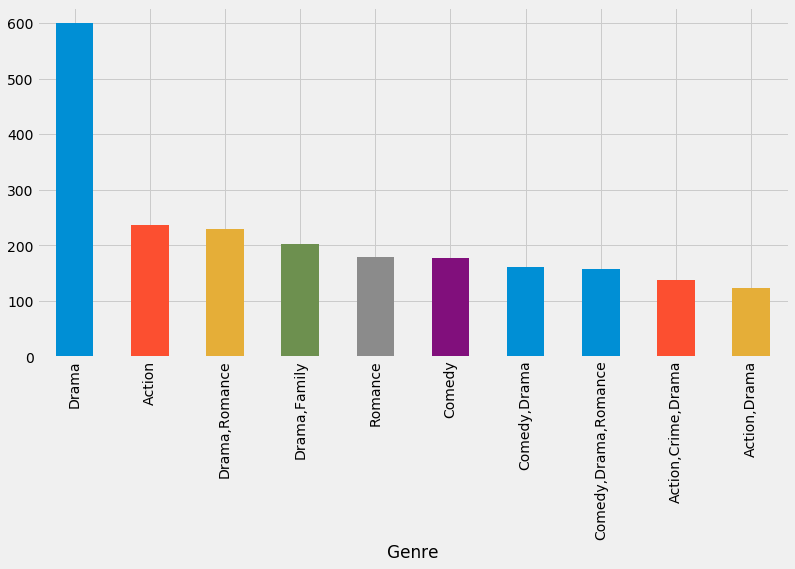

In [43]:
most_pop = (movies_with_grouped_genres.size().sort_values(ascending = False)[:10])
most_pop.plot.bar()
plt.show()

Clearly Visible, combinations of **Drama, Romance** and **Drama, Family** are the most popular by far.

## Number of Unique Stars


In [44]:
# df of movies for which stars info is present
movies_with_stars = data[data['Stars'].isnull() == False]
# no of movies for which stars info is present
movies_with_stars.shape[0]

5557

There are total **5557** diff movies for which an actor or more is present.

In [45]:
unique_stars = set()
for stars in movies_with_stars['Stars'].str.split(","):
    for star in stars:
        unique_stars.add(star)
# display
print("Number of Unique Stars : {}".format(len(unique_stars)))

Number of Unique Stars : 4042


**4042** different actor names are present.

In [48]:
# Group movies by stars
movies_by_star = dict()

# Creating a dictionary of movies accessed by star
for star in unique_stars:
    movies_by_star[star] = movies_with_stars[movies_with_stars['Stars'].apply(lambda x: star in x )]

In [49]:
# Create a dictionary mapping of star and number of movies
# that the actor stared in
count_of_movies_by_star = dict()

for star in unique_stars:
    count_of_movies_by_star[star] = movies_by_star[star]['Title'].count()

count_of_movies_by_star = pd.Series(count_of_movies_by_star).sort_values(ascending=False)

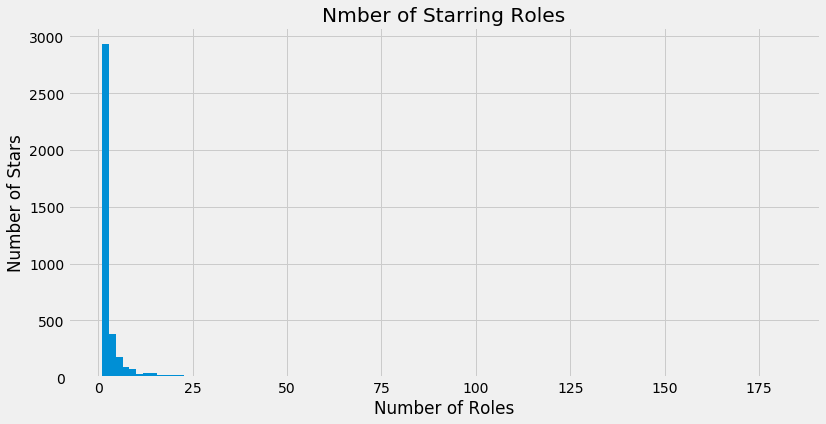

In [50]:
# Histogram of number of starring roles
plt.hist(count_of_movies_by_star, bins=100)
plt.title('Nmber of Starring Roles')
plt.ylabel('Number of Stars')
plt.xlabel('Number of Roles')
plt.show()

In [51]:
count_of_movies_by_star.median()

1.0

The disributon of starring roles is heavily skewed to the right. Most actors have starred in only 1 movie and hardly anyone has appeared in more than **25** movies.

In [53]:
# The 20 most featured actors
print("Number of movies by each star (top 20)")
count_of_movies_by_star[:20]

Number of movies by each star (top 20)


Amit                  182
Mithun Chakraborty    182
Dharmendra            162
Amitabh Bachchan      152
Jeetendra             137
Ashok Kumar           128
Rekha                 125
Rajesh Khanna         123
Sanjay Dutt           115
Akshay Kumar          114
Chand                 112
Vinod Khanna          102
Arun                  101
Ajay                   98
Shashi Kapoor          97
Govinda                95
Raj Babbar             94
Madhu                  94
Rishi Kapoor           93
Jackie Shroff          93
dtype: int64

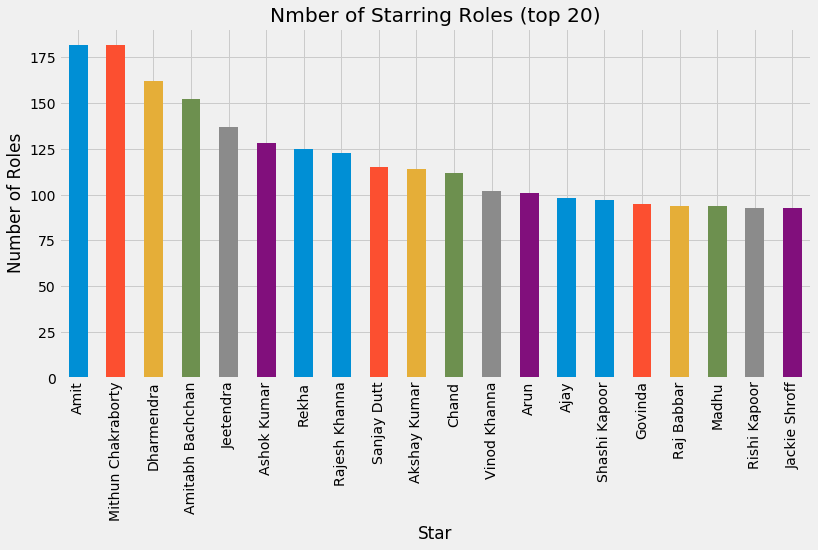

In [54]:
# Plot of the 20 stars with the highest number of roles
count_of_movies_by_star[:20].plot.bar()
plt.title('Nmber of Starring Roles (top 20)')
plt.ylabel('Number of Roles')
plt.xlabel('Star')
plt.show()

Actor with **max** no of roles is **Mithun Chakraborty** having stared **182** roles. **Rekha** played the max number of roles as an actress which are **125** roles.

## Number of unique directors


In [58]:
# Create a dataframe consisting of moies for which 
# name of director is present 
movies_with_director = data[(data['Director'].isnull() == False)]

# Group movies by unique direcotrs 
movies_by_director = movies_with_director.groupby('Director').size().sort_values(ascending=False)

movies_by_director.head()

Director
[]                      59
David Dhawan            43
Mahesh Bhatt            38
Hrishikesh Mukherjee    35
Rama Rao Tatineni       34
dtype: int64

In [59]:
# '[]' is not a valid value for director there ignore and remove
movies_by_director = movies_by_director.drop(labels='[]', axis='index')

In [62]:
print('Number of unique directors: {}'.format(movies_by_director.size))
print('Director with the highest number of movies: {}'.format(movies_by_director.index[0]))
print('Maximum number of movies directed: {}'.format(movies_by_director.iloc[0]))

Number of unique directors: 2163
Director with the highest number of movies: David Dhawan
Maximum number of movies directed: 43


There are **2163** different directors, and amongst them **David Dhawan** is the one who has directed the highest number of movies with **43** films to his credit.

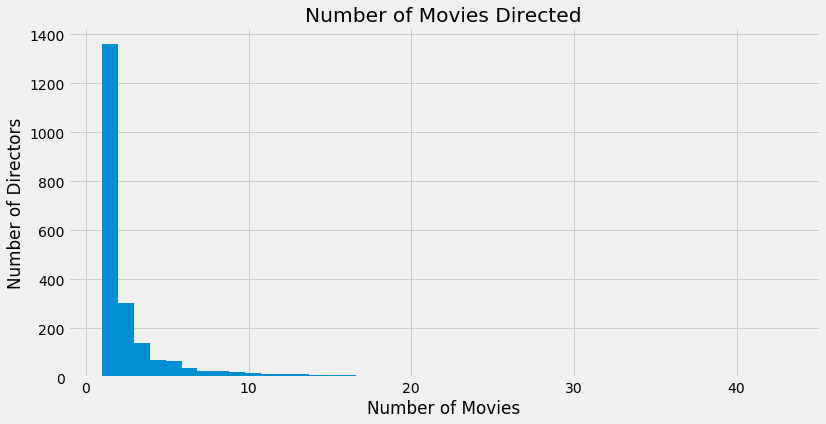

In [63]:
# Histogram of movies directed
plt.hist(movies_by_director, bins=43)
plt.title("Number of Movies Directed")
plt.xlabel("Number of Movies")
plt.ylabel("Number of Directors")
plt.show()

In [64]:
movies_by_director.describe()

count    2163.000000
mean        2.564956
std         3.780985
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        43.000000
dtype: float64

The histogram is **skewed to its right** due to *small* number of directors directing a *large* number of movies. 
The skewness also indicates, most of the directors only get once chance to direct only one movie or two at the max and the careers end. Very few direct 3rd or 4th film and fewer still go on to direct more.